# Digital Image Processing

## Introduction




Digital Image Processing (DIP) is the field of using computational methods to manipulate, enhance, and analyze digital images.

* Photography and Entertainment – noise reduction, adobe photoshop, special effects in movie, video games
* Remote Sensing and GIS – mapping, land-use analysis, disaster management, environmental monitoring
* Industrial Applications – defect detection, product sorting, Self-Driving etc  

We have various applications in civil engineering. By harnessing algorithms and mathematical operations, DIP plays a pivotal role in transforming raw visual data into valuable information across diverse domains.

In this notebook, we cover various techniques and concepts using Python and popular libraries that can handle images.



## Python LIbraries


There are several Python libraries that are commonly used for handling and manipulating images. Here are some popular ones:

1.   **OpenCV (Open Source Computer Vision Library):**  A comprehensive library for computer vision tasks, offering image manipulation, object detection, and various algorithms.
2.   **PIL (Python Imaging Library) / Pillow:** Widely used for basic image operations like opening, saving, and resizing images.
3.  **Numpy:** Essential for numerical computations, often used to manipulate image data as arrays.
4.  **Scipy:** Offers various image processing functions like filtering, interpolation, and morphological operations.
5.  **Imageio:** Simplifies reading and writing different image formats, supporting a wide range of formats.
6.  **Matplotlib:** Primarily used for data visualization but can display and visualize images as well.

Each library has their own strengths and limitations. People in general use different ones for different use cases dependning on the type of the data and specific job requirements.

## Import Statements

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import sys

## Getting started with Image Processing



In [3]:
# Reading an RGB image in grayscale
image_grascale = cv2.imread('/content/rgb1.png', 0)
image_color = cv2.imread('/content/rgb1.png' )

In [12]:
# Analyze the type of the grayscale image, size of the image and try to get an intensity at a particular pixel
print("The loaded grayscale image is of type:",type(image_grascale))
print("The loaded grayscale image is of size:",image_grascale.shape)
print("intensity at index", image_grascale[150][150])
#image_grascale.size

The loaded grayscale image is of type: <class 'numpy.ndarray'>
The loaded grayscale image is of size: (434, 576)
intensity at index 164


In [15]:
# Analyze the type of the color image, size of the image and try to get an intensity at a particular pixel
print("The loaded color image is of type:",type(image_color))
print("The loaded color image is of size:",image_color.shape)
print("intensity at index", image_color[150][150])


The loaded color image is of type: <class 'numpy.ndarray'>
The loaded color image is of size: (434, 576, 3)
intensity at index [161 161 169]


##### OpenCV reads imags in B,G,R format. Matplotlib processes images in R,G,B format. If we want to uses images read in OpenCV and interface with Matplotlib we need to convert BGR images to RGB images


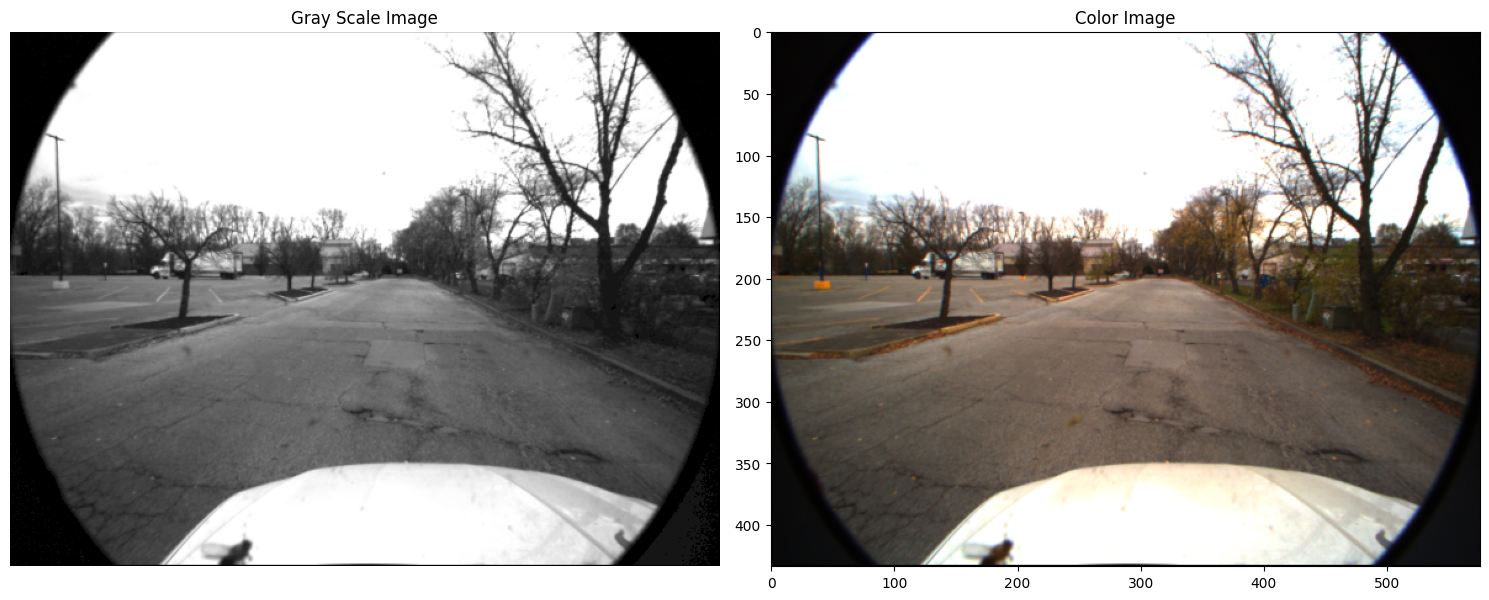

In [21]:
# Convert BGR to RGB format (for matplotlib compatibility)
image_grascale_rgb = cv2.cvtColor(image_grascale, cv2.COLOR_BGR2RGB)
image_color_rgb = cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)

# Displaying the grayscale and color images side by side
#Setup a figure with subplots
fig, axes = plt.subplots (1,2, figsize = (15, 15))

# Display images on the subplots
axes[0].imshow(image_grascale_rgb)
axes[0].set_title('Gray Scale Image')
axes[0].axis('off')

axes[1].imshow(image_color_rgb)
axes[1].set_title('Color Image')
axes[0].axis('off')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

## Visualize Color Channels


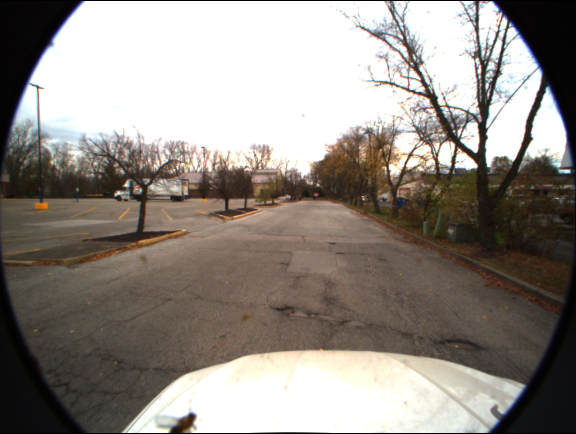

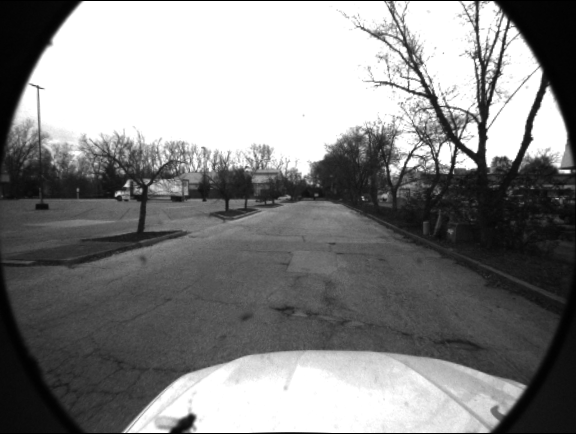

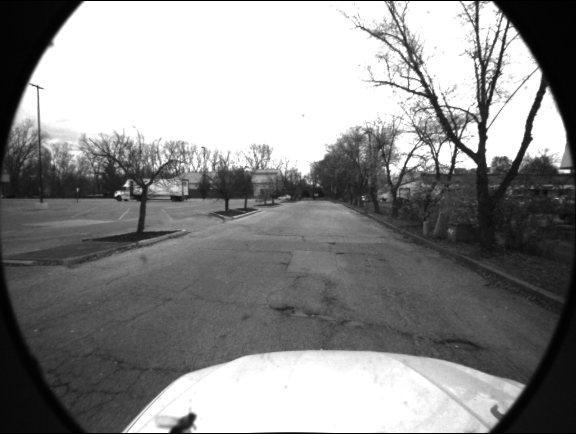

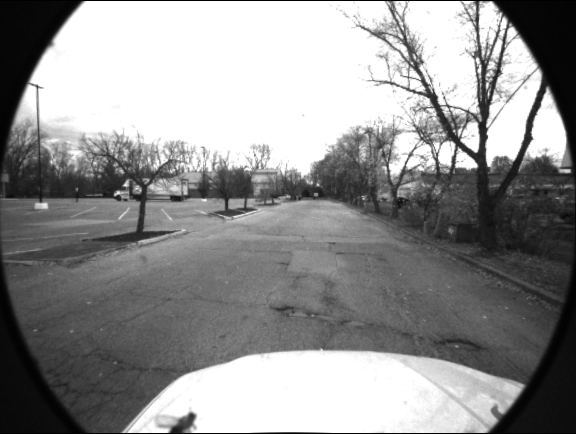

In [24]:
#separating each color. Note the order of colors to separate each channel use the function split
image_blue_channel = image_color[:,:,0] #this will give blue channel
image_green_channel = image_color[:,:,1]#green
image_red_channel = image_color[:,:,2]#red
cv2_imshow(image_color)
cv2_imshow(image_blue_channel)
cv2_imshow(image_green_channel)
cv2_imshow(image_red_channel)

##### You can see the R, G, B images are showin in grayscale. When we display individual color channels (red, green, and blue) seperately in OpenCv, they appear grayscale because each channel is treated as a seperate grayscale image. Lets try displaying with their own color by combining the other channels correctly.


`cv2.merge()`: is used to combine each channel with zeros in the other two channels to visualize them in their respective colors.

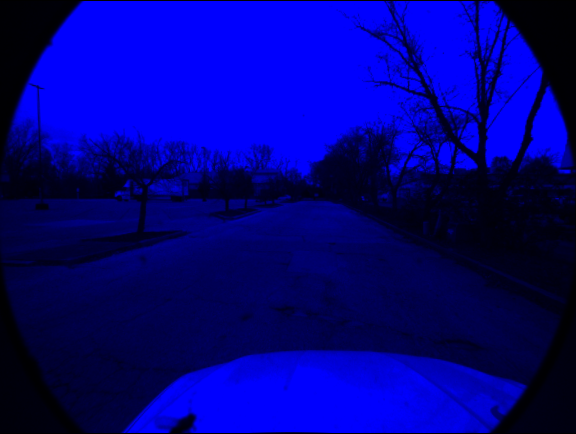

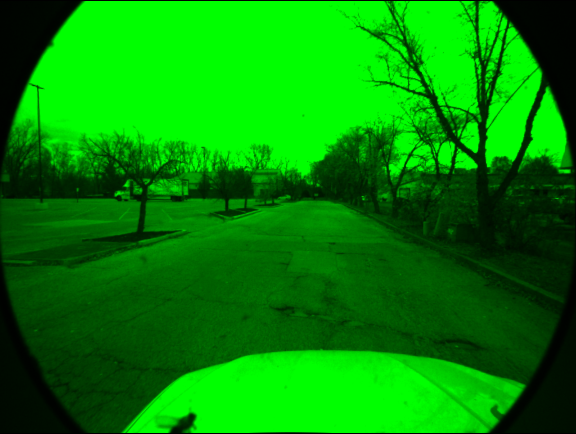

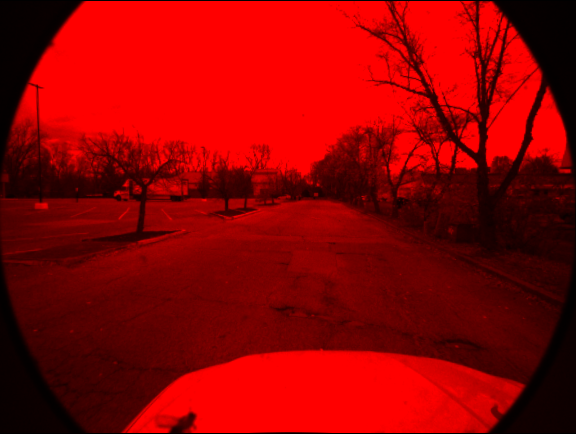

In [25]:
# Display the individual channels in their respective colors using OpenCV
cv2_imshow(cv2.merge([image_blue_channel, np.zeros_like(image_blue_channel), np.zeros_like(image_blue_channel)]))
cv2_imshow(cv2.merge([np.zeros_like(image_green_channel), image_green_channel, np.zeros_like(image_green_channel)]))
cv2_imshow(cv2.merge([np.zeros_like(image_red_channel), np.zeros_like(image_red_channel), image_red_channel]))


## HSV (Hue, Saturation, Value)

HSV is a color representation model widely used in computer vision and image processing. It provides an alternative way to describe and work with colors. Using HSV color space instead of RGB offers several benefits.



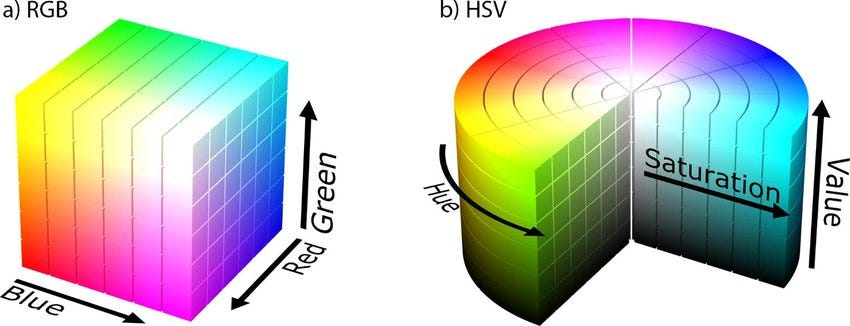



**Hue:** It represents the dominant wavelength of light. It ranges from **0 to 360 degrees**, forming a color wheel. Unlike RGB, which combines different amounts of red, green, and blue light to create colors, hue represents color itself.

**Saturation:** Saturation refers to the **intensity or vividness of the color**. A higher saturation value means the color is more vibrant, while a lower saturation value leads to a more muted or grayscale appearance.

**Value (or Brightness):** Value represents the **brightness of the color**. A higher value results in a brighter color, while a lower value makes the color darker.



| Aspect                       | RGB Color Space                             | HSV Color Space                             |
|------------------------------|---------------------------------------------|---------------------------------------------|
| Components                   | Red, Green, Blue                           | Hue, Saturation, Value (Brightness)         |
| Hue                         | -                                           | Represents color itself (0-360 degrees)    |
| Saturation                  | -                                           | Intensity or vividness of the color        |
| Value (Brightness)         | -                                           | Brightness of the color                    |
| Robustness to Lighting      | Sensitive to lighting variations          | More robust to lighting variations         |
| Color Thresholding         | Challenging due to lighting changes      | Easier due to separation of color info     |
| Color Segmentation        | Complex due to varying lighting          | Simplified due to separate hue             |
| Color Adjustments         | Less intuitive                            | More intuitive for hue, saturation, value  |
| Human Perception          | Less aligned with human perception      | More aligned with how humans perceive     |
| Luminance Insensitivity   | More sensitive to changes in luminance  | Less sensitive to changes in brightness    |
| Color Harmony Analysis   | Less useful for analyzing harmony       | Useful for analyzing color harmony         |
| Object Detection         | Less robust to lighting changes        | More robust in certain lighting conditions |
| Display Technologies     | Directly used in monitors, screens     | Used more for image processing and analysis|


From the above table, you can see the benefits of HSV over RGB in image processing and computer vision especially while analysing images in different lighting conditions

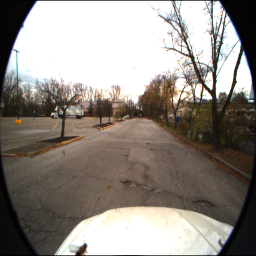

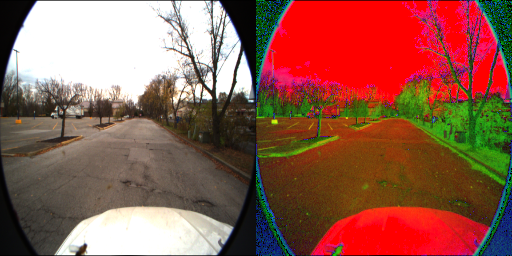

In [26]:
image_bgr = cv2.imread('/content/rgb1.png')
image_color_resized = cv2.resize(image_bgr, (256,256))
cv2_imshow(image_color_resized)
# Convert the image to HSV
image_hsv = cv2.cvtColor(image_color_resized, cv2.COLOR_BGR2HSV)

# Display the original and HSV images side by side
cv2_imshow(cv2.hconcat([image_color_resized, image_hsv]))

##### HSV image look different from RGB image due to the inherent differences between the two color spaces. HSV and RGB represent colors in different ways, and their relationships to eachother are not always straightforward.